# Costs of xDBiT compared to other methods

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
# load data
data = pd.read_excel("../source_data/costs_xdbit.xlsx", 
                        nrows=6).dropna(how="all", axis=1).set_index("Category")
data = data.T.reset_index()
data = data.rename(columns={"index": "Method"})

# create an output directory for the figures if it doesn't exist
Path("figures").mkdir(parents=True, exist_ok=True)

In [5]:
data

Category,Method,Number of sections,Spots per section,Total number of spots,Costs per slide,Costs per section,Costs per spot
0,xDBiT,9.0,1369.0,12321.0,882.942862,98.104762,0.071662
1,DBiT-seq,1.0,2500.0,2500.0,277.240618,277.240618,0.110896
2,Visium,4.0,4992.0,19968.0,5000.000000,1250.000000,0.250401


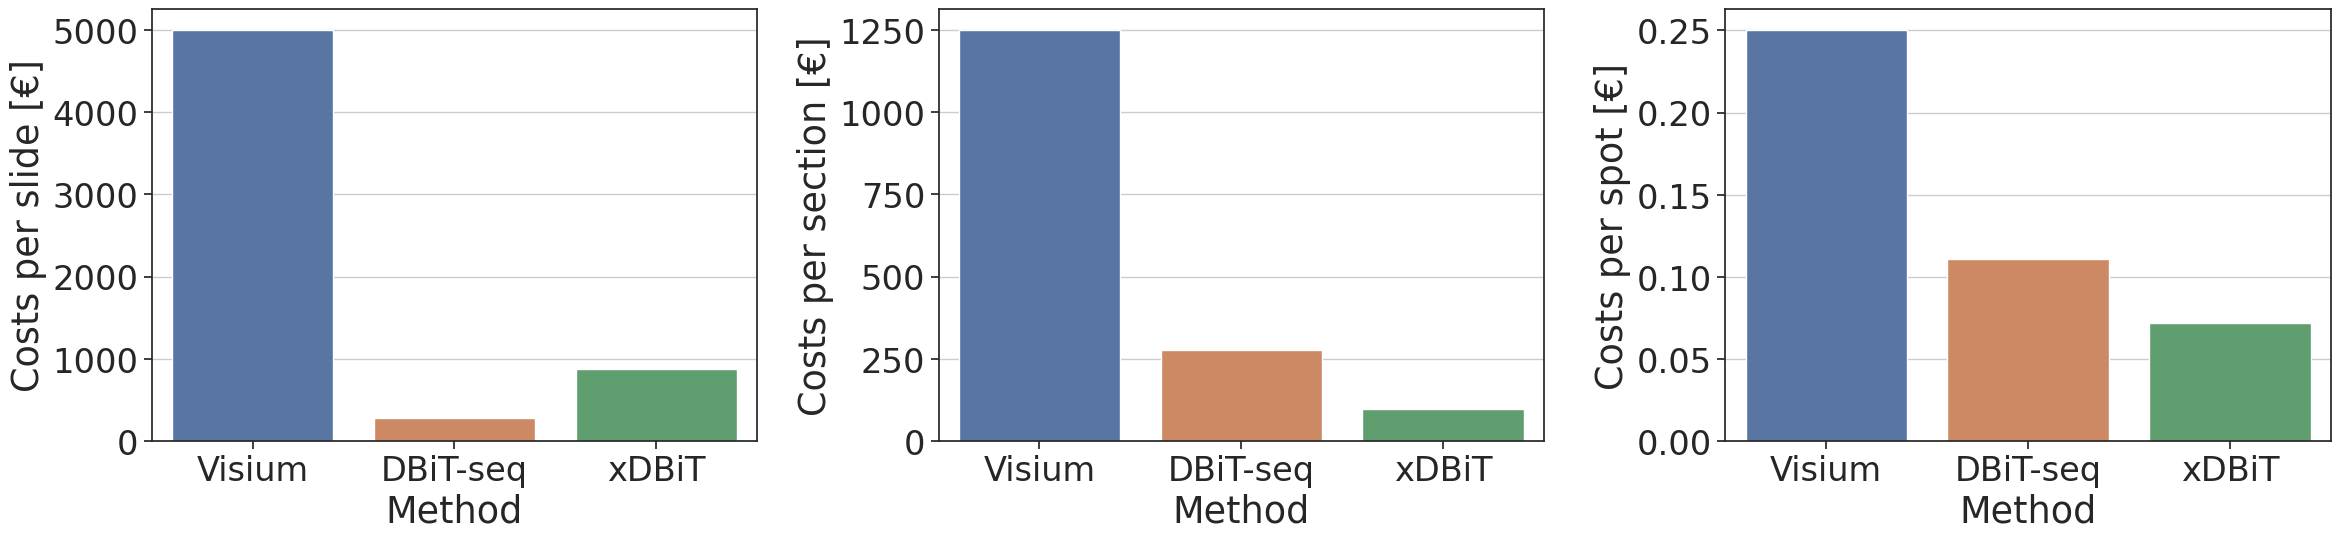

In [7]:
cats = ["Costs per slide", "Costs per section", "Costs per spot"]

sns.set(font_scale=2.2, style='ticks', font='DejaVu Sans')

nrows = 1
ncols = len(cats)

fig, axs = plt.subplots(nrows, ncols, figsize=(8*ncols, 6*nrows))

for i, cat in enumerate(cats):
    sns.barplot(data=data, x="Method", y=cat, order=["Visium", "DBiT-seq", "xDBiT"], ax=axs[i])
    axs[i].set_ylabel(cat + " [€]")
    axs[i].grid(axis='y')

plt.tight_layout()
fig.savefig("figures/costs_dbitx_comparison.pdf")
plt.show()